Paquetes necesarios

In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

TAREA: Crea una imagen, p.e. 800x800, con la textura del tablero de ajedrez

In [ ]:
#Tablero de ajedrez


TAREA: Crear una imagen estilo Mondrian (un ejemplo https://www3.gobiernodecanarias.org/medusa/ecoescuela/sa/2017/04/17/descubriendo-a-mondrian/ )

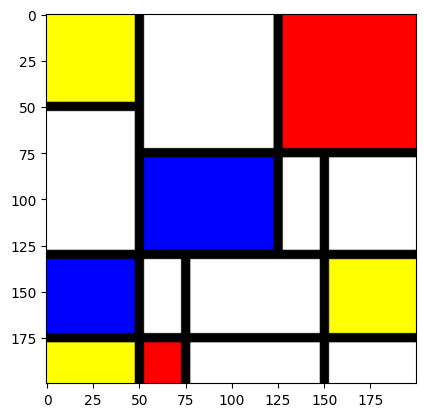

True

In [10]:
#Crea una imagen con tres planos
import cv2  
import numpy as np
import matplotlib.pyplot as plt
#Dimensiones de la imagen a crear
ancho = 200
alto = 200

color_img = np.zeros((200,200,3), dtype = np.uint8)
color_img[:,:,:] = 255

#Rectángulo relleno
cv2.rectangle(color_img,(50,0),(0,50),(255,255,0),-1)

cv2.rectangle(color_img,(125, 75),(50,130),(0,0,255),-1)

cv2.rectangle(color_img,(ancho, 0),(125,75),(255,0,0),-1)

cv2.rectangle(color_img,(50,130),(0,175),(0,0,255),-1)

cv2.rectangle(color_img,(ancho,130),(150,175),(255,255,0),-1)

cv2.rectangle(color_img,(50,175),(0,alto),(255,255,0),-1)

cv2.rectangle(color_img,(75,175),(50,alto),(255,0,0),-1)

#Línea roja vertical de grosor 3
cv2.line(color_img, (50,0) , (50,alto) , (0,0,0) ,3)

cv2.line(color_img, (0, 175) , (ancho, 175) , (0,0,0) ,3)

cv2.line(color_img, (0, 130) , (ancho, 130) , (0,0,0) ,3)

cv2.line(color_img, (0, 50) , (50, 50) , (0,0,0) ,3)

cv2.line(color_img, (50, 75) , (ancho, 75) , (0,0,0) ,3)

cv2.line(color_img, (125,0) , (125,130) , (0,0,0) ,3)

cv2.line(color_img, (150,75) , (150,alto) , (0,0,0) ,3)

cv2.line(color_img, (75,130) , (75,alto) , (0,0,0) ,3)
#Visualiza sin especificar el mapa de color gris
plt.imshow(color_img) 
plt.show()


#Salva la imagen resultante a disco
cv2.imwrite('imagen.jpg', color_img)

TAREA: Resuelve una de las tareas previas (a elegir) con las funciones de dibujo de OpenCV  :)

Separa los tres planos de la imagen captada por la webcam
TAREA: 
Modificar uno de los planos

In [4]:
vid = cv2.VideoCapture(0)
  
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        #Separamos canales
        b = frame[:,:,0]
        g = frame[:,:,1]
        r = frame[:,:,2]
        #Dimensiones
        h, w, c = frame.shape

        #modificación de uno de los planos
        b = b + 140

        #Concateamos en horizontal los tres planos del fotograma
        collage = np.hstack((r, g, b))
    
        # Muestra fotograma redimensionando a la mitad para que quepa en pantalla
        cv2.imshow('Cam3', cv2.resize(collage, (int(w*1.5),int(h/2)),cv2.INTER_NEAREST))
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

TAREA:
Pintar círculos en las posiciones del píxel más claro y oscuro de la imagen 
¿Si quisieras hacerlo sobre la zona 8x8 más clara/oscura?



TAREA: Haz tu propuesta Pop Art

In [7]:
vid = cv2.VideoCapture(0)

#Dimensiones de la cámara
w = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))

#Fuerzo a mitad de resolución para ocupar menos pantalla
w=int(w/2)
h=int(h/2)
vid.set(cv2.CAP_PROP_FRAME_WIDTH, w) #En Mac no reacciona a estos comandos
vid.set(cv2.CAP_PROP_FRAME_HEIGHT, h)

#Imagen conjunta 2x original
collage = np.zeros((h*2,w*2,3), dtype = np.uint8)
tl = collage[0:h,0:w]
tr = collage[0:h,w:w+w]
bl = collage[h:h+h,0:w]
br = collage[h:h+h,w:w+w]

while True:      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        #Separamos canales
        r = frame[:,:,2]
        g = frame[:,:,1]
        b = frame[:,:,0]

        #Jugamos
        tl[:,:,0] = b + 140
        tl[:,:,1] = g
        tl[:,:,2] = r - 25

        tr[:,:,0] = 255 - r
        tr[:,:,1] = g + 60
        tr[:,:,2] = b
        
        bl[:,:,0] = r
        bl[:,:,1] = 255 - b
        bl[:,:,2] = g

        br[:,:,0] = b
        br[:,:,1] = 255 - g
        br[:,:,2] = r + r
    
        # Muestra composicion
        cv2.imshow('Cam', collage)
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()